# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

> Autor: Dayvson Silva - 1915310007

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A fim de diminuir a repetição de código, o algoritmo do Perceptron de Rosenblatt foi reimplementado em formato de uma classe, a qual pode ser econtrada na pasta src.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Execução das configurações

    Cada configuração é executada 100 vezes

### Configuração 1.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [8]:
learning_rate = 0.4
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)

    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)
    

c1e = epochs
c1a = adjustments
c1em = np.round(np.mean(epochs), 4)
c1esd = np.round(np.std(epochs), 4)
c1am = np.round(np.mean(adjustments), 4)
c1asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c1em, " Desvio Padrão: ", c1esd)
print("Ajustes. Média: ", c1am, " Desvio Padrão: ", c1asd)


	Iteração número  1

Quantidade total de épocas: 17
Quantidade total de ajustes: 693
Vetor final de pesos: [ 11.9075 -16.9936  39.1252]

	Iteração número  2

Quantidade total de épocas: 18
Quantidade total de ajustes: 240
Vetor final de pesos: [ 17.2614 -25.5774  57.2609]

	Iteração número  3

Quantidade total de épocas: 6
Quantidade total de ajustes: 85
Vetor final de pesos: [ 51.9155 -42.5545 125.196 ]

	Iteração número  4

Quantidade total de épocas: 12
Quantidade total de ajustes: 86
Vetor final de pesos: [47.0389 26.4535 70.4553]

	Iteração número  5

Quantidade total de épocas: 13
Quantidade total de ajustes: 463
Vetor final de pesos: [19.8735 11.0746 29.7644]

	Iteração número  6

Quantidade total de épocas: 7
Quantidade total de ajustes: 410
Vetor final de pesos: [3.8266 2.1732 6.0514]

	Iteração número  7

Quantidade total de épocas: 9
Quantidade total de ajustes: 202
Vetor final de pesos: [ 0.9773 -0.1905  1.581 ]

	Iteração número  8

Quantidade total de épocas: 10
Quantida


Quantidade total de épocas: 13
Quantidade total de ajustes: 222
Vetor final de pesos: [24.822  14.6613 37.4047]

	Iteração número  63

Quantidade total de épocas: 17
Quantidade total de ajustes: 266
Vetor final de pesos: [33.0543 19.0061 49.4364]

	Iteração número  64

Quantidade total de épocas: 8
Quantidade total de ajustes: 293
Vetor final de pesos: [10.1809  5.9365 15.2757]

	Iteração número  65

Quantidade total de épocas: 7
Quantidade total de ajustes: 252
Vetor final de pesos: [17.8533  6.1077 40.0453]

	Iteração número  66

Quantidade total de épocas: 27
Quantidade total de ajustes: 143
Vetor final de pesos: [59.5038 35.3909 89.3826]

	Iteração número  67

Quantidade total de épocas: 8
Quantidade total de ajustes: 446
Vetor final de pesos: [6.0616 3.0527 9.2643]

	Iteração número  68

Quantidade total de épocas: 8
Quantidade total de ajustes: 620
Vetor final de pesos: [3.5441 1.409  5.3766]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 111
V

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [9]:
weights = perceptron.weights
weights

array([31.5654, 18.7407, 47.6003])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [10]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.6631 -(0.3937)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

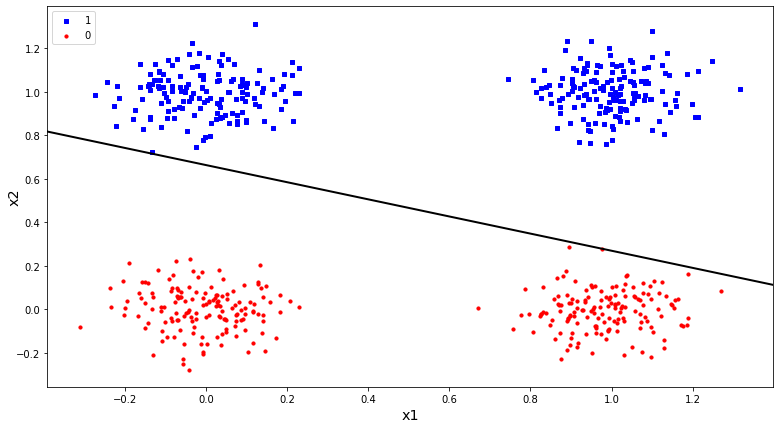

In [11]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [12]:
learning_rate = 0.4
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c2e = epochs
c2a = adjustments
c2em = np.round(np.mean(epochs), 4)
c2esd = np.round(np.std(epochs), 4)
c2am = np.round(np.mean(adjustments), 4)
c2asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c2em, " Desvio Padrão: ", c2esd)
print("Ajustes. Média: ", c2am, " Desvio Padrão: ", c2asd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 8
Vetor final de pesos: [0.5576 0.0246 1.1735]

	Iteração número  2

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.5037 -0.0472  0.8504]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.5188 -0.1816  1.4258]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [0.6238 0.2455 1.0954]

	Iteração número  5

Quantidade total de épocas: 6
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.6666 -0.0644  1.0499]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 12
Vetor final de pesos: [0.6094 0.0814 1.3137]

	Iteração número  7

Quantidade total de épocas: 8
Quantidade total de ajustes: 17
Vetor final de pesos: [ 0.8214 -0.3219  1.6815]

	Iteração número  8

Quantidade total de épocas: 6
Quantidade total de ajustes: 13
Vetor


Quantidade total de épocas: 8
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.8225 -0.3307  1.6329]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.3852 -0.2047  0.9355]

	Iteração número  69

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.4946 0.0611 0.8388]

	Iteração número  70

Quantidade total de épocas: 3
Quantidade total de ajustes: 3
Vetor final de pesos: [ 0.1702 -0.0345  0.3903]

	Iteração número  71

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.5987 0.199  1.1393]

	Iteração número  72

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.4137 -0.0838  0.6745]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.3308 -0.2339  0.7453]

	Iteração número  74

Quantidade total de épocas: 7
Quantidade total de ajustes: 11
Vetor final de pes

#### O seguinte vetor de pesos, obtido na última execução da configuração 2, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [13]:
weights = perceptron.weights
weights

array([ 0.7585, -0.1222,  1.3425])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [14]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.565 -(-0.091)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

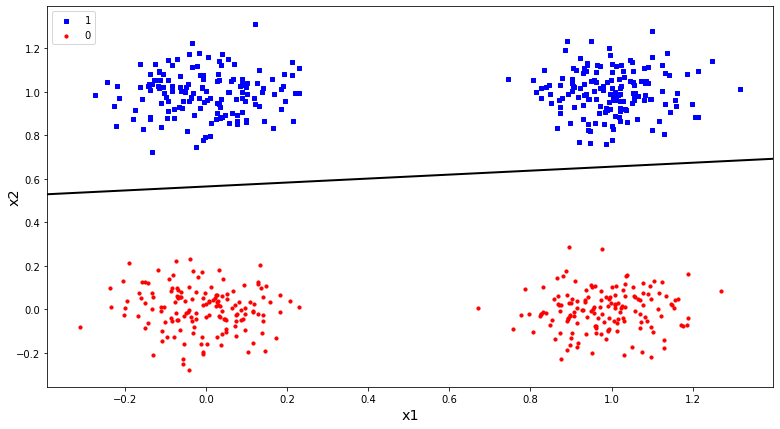

In [15]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 3.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [16]:
learning_rate = 0.4
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c3e = epochs
c3a = adjustments
c3em = np.round(np.mean(epochs), 4)
c3esd = np.round(np.std(epochs), 4)
c3am = np.round(np.mean(adjustments), 4)
c3asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c3em, " Desvio Padrão: ", c3esd)
print("Ajustes. Média: ", c3am, " Desvio Padrão: ", c3asd)


	Iteração número  1

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.3857 -0.2025  1.0064]

	Iteração número  2

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.4424 0.1091 0.7405]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [0.6273 0.1981 1.1779]

	Iteração número  4

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.3641 -0.211   0.7605]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 8
Vetor final de pesos: [0.452  0.0526 1.2107]

	Iteração número  6

Quantidade total de épocas: 9
Quantidade total de ajustes: 17
Vetor final de pesos: [ 1.0061 -0.1269  1.6258]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [0.2277 0.0334 0.4285]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor fina


Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.2593 -0.0761  0.7262]

	Iteração número  66

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [0.4462 0.1589 0.8684]

	Iteração número  67

Quantidade total de épocas: 7
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.533  -0.0273  1.4949]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.3851 -0.1047  0.7406]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.5501 -0.0011  1.0078]

	Iteração número  70

Quantidade total de épocas: 9
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.9047 -0.2672  1.6511]

	Iteração número  71

Quantidade total de épocas: 4
Quantidade total de ajustes: 8
Vetor final de pesos: [0.3095 0.0709 0.686 ]

	Iteração número  72

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pes

#### O seguinte vetor de pesos, obtido na última execução da configuração 3, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [17]:
weights = perceptron.weights
weights

array([ 0.774 , -0.1953,  1.332 ])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [18]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5811 -(-0.1466)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

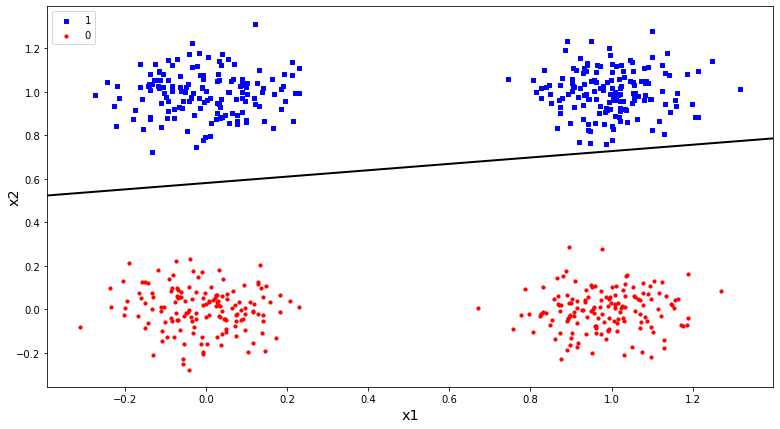

In [19]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 4.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [48]:
learning_rate = 0.1
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c4e = epochs
c4a = adjustments
c4em = np.round(np.mean(epochs), 4)
c4esd = np.round(np.std(epochs), 4)
c4am = np.round(np.mean(adjustments), 4)
c4asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c4em, " Desvio Padrão: ", c4esd)
print("Ajustes. Média: ", c4am, " Desvio Padrão: ", c4asd)


	Iteração número  1

Quantidade total de épocas: 15
Quantidade total de ajustes: 98
Vetor final de pesos: [25.5784 13.7811 42.9433]

	Iteração número  2

Quantidade total de épocas: 71
Quantidade total de ajustes: 1090
Vetor final de pesos: [37.9466 22.5908 56.8986]

	Iteração número  3

Quantidade total de épocas: 18
Quantidade total de ajustes: 356
Vetor final de pesos: [ 3.5874 -5.1397 11.7325]

	Iteração número  4

Quantidade total de épocas: 36
Quantidade total de ajustes: 1143
Vetor final de pesos: [17.2668 10.2152 25.9212]

	Iteração número  5

Quantidade total de épocas: 9
Quantidade total de ajustes: 1604
Vetor final de pesos: [0.1522 0.0014 0.2729]

	Iteração número  6

Quantidade total de épocas: 15
Quantidade total de ajustes: 924
Vetor final de pesos: [ 2.1723 -3.1813  7.2143]

	Iteração número  7

Quantidade total de épocas: 93
Quantidade total de ajustes: 1820
Vetor final de pesos: [ 20.9727 -30.9326  69.4525]

	Iteração número  8

Quantidade total de épocas: 39
Quantid


Quantidade total de épocas: 34
Quantidade total de ajustes: 1900
Vetor final de pesos: [ 6.035  -8.9031 20.054 ]

	Iteração número  63

Quantidade total de épocas: 51
Quantidade total de ajustes: 145
Vetor final de pesos: [ 76.074   12.624  107.8436]

	Iteração número  64

Quantidade total de épocas: 10
Quantidade total de ajustes: 1272
Vetor final de pesos: [ 0.3095 -0.2835  0.9884]

	Iteração número  65

Quantidade total de épocas: 22
Quantidade total de ajustes: 1507
Vetor final de pesos: [ 9.1131  5.3337 13.7099]

	Iteração número  66

Quantidade total de épocas: 12
Quantidade total de ajustes: 1665
Vetor final de pesos: [2.6946 1.476  4.0352]

	Iteração número  67

Quantidade total de épocas: 49
Quantidade total de ajustes: 609
Vetor final de pesos: [25.279  15.0442 37.9995]

	Iteração número  68

Quantidade total de épocas: 49
Quantidade total de ajustes: 600
Vetor final de pesos: [ 11.4782 -16.8275  37.8881]

	Iteração número  69

Quantidade total de épocas: 55
Quantidade total

#### O seguinte vetor de pesos, obtido na última execução da configuração 4, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [49]:
weights = perceptron.weights
weights

array([ 17.9825, -26.6319,  59.8682])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [50]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3004 -(-0.4448)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

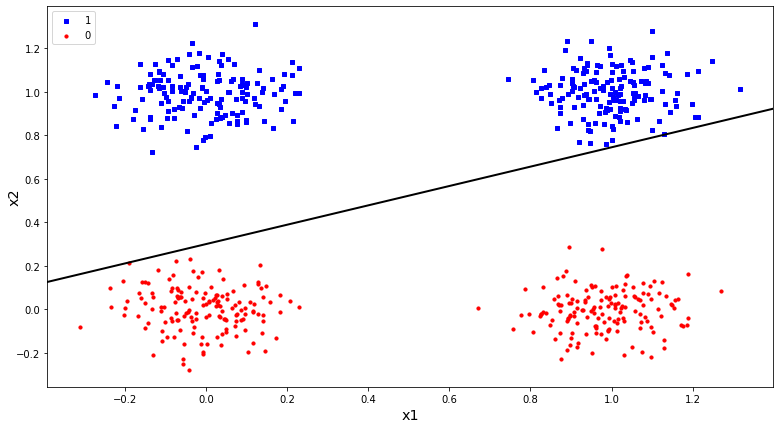

In [51]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 5.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [24]:
learning_rate = 0.1
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c5e = epochs
c5a = adjustments
c5em = np.round(np.mean(epochs), 4)
c5esd = np.round(np.std(epochs), 4)
c5am = np.round(np.mean(adjustments), 4)
c5asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c5em, " Desvio Padrão: ", c5esd)
print("Ajustes. Média: ", c5am, " Desvio Padrão: ", c5asd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 24
Vetor final de pesos: [0.2297 0.0732 0.3903]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 12
Vetor final de pesos: [0.3244 0.0611 0.5324]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [0.5465 0.1503 0.835 ]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.1945 -0.0868  0.4459]

	Iteração número  5

Quantidade total de épocas: 3
Quantidade total de ajustes: 12
Vetor final de pesos: [ 0.2565 -0.2966  0.7778]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 25
Vetor final de pesos: [0.0422 0.0048 0.0888]

	Iteração número  7

Quantidade total de épocas: 3
Quantidade total de ajustes: 1
Vetor final de pesos: [ 0.2492 -0.213   0.8754]

	Iteração número  8

Quantidade total de épocas: 9
Quantidade total de ajustes: 30
Vetor 


Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [0.5116 0.141  0.7444]

	Iteração número  65

Quantidade total de épocas: 6
Quantidade total de ajustes: 25
Vetor final de pesos: [ 0.2851 -0.2244  0.8399]

	Iteração número  66

Quantidade total de épocas: 5
Quantidade total de ajustes: 12
Vetor final de pesos: [0.3393 0.0764 0.6402]

	Iteração número  67

Quantidade total de épocas: 5
Quantidade total de ajustes: 24
Vetor final de pesos: [ 0.0639 -0.023   0.2127]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.3123 0.1254 0.4865]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 27
Vetor final de pesos: [ 0.287  -0.1727  0.7256]

	Iteração número  70

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.3551 -0.302   0.9592]

	Iteração número  71

Quantidade total de épocas: 4
Quantidade total de ajustes: 21
Vetor final de pe

#### O seguinte vetor de pesos, obtido na última execução da configuração 5, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [25]:
weights = perceptron.weights
weights

array([ 0.3691, -0.3036,  1.0338])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [26]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.357 -(-0.2937)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

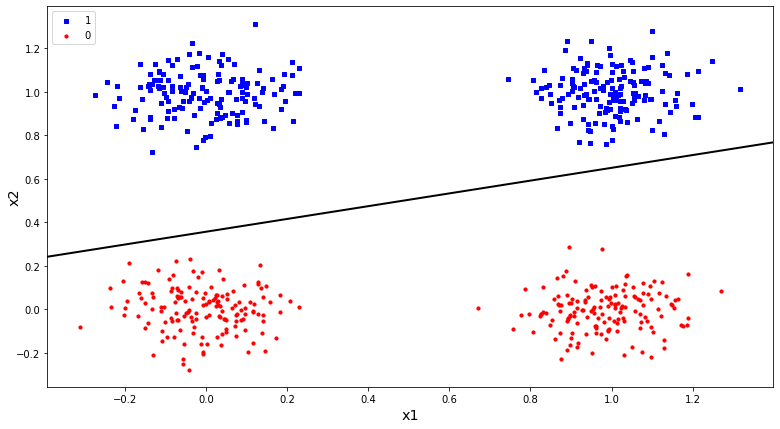

In [27]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 6.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

#### Execuções

In [28]:
learning_rate = 0.1
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c6e = epochs
c6a = adjustments
c6em = np.round(np.mean(epochs), 4)
c6esd = np.round(np.std(epochs), 4)
c6am = np.round(np.mean(adjustments), 4)
c6asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c6em, " Desvio Padrão: ", c6esd)
print("Ajustes. Média: ", c6am, " Desvio Padrão: ", c6asd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.1071 -0.0498  0.3648]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.1262 -0.1422  0.4318]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 12
Vetor final de pesos: [ 0.2029 -0.0912  0.541 ]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.1843 -0.1205  0.4968]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.0744 -0.0313  0.1979]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 5
Vetor final de pesos: [0.3337 0.0083 0.4981]

	Iteração número  7

Quantidade total de épocas: 6
Quantidade total de ajustes: 18
Vetor final de pesos: [0.1408 0.0021 0.2807]

	Iteração número  8

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
V


Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.2679 0.0334 0.5054]

	Iteração número  68

Quantidade total de épocas: 5
Quantidade total de ajustes: 15
Vetor final de pesos: [ 0.112  -0.0024  0.2038]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [0.1961 0.0604 0.3896]

	Iteração número  70

Quantidade total de épocas: 4
Quantidade total de ajustes: 11
Vetor final de pesos: [0.2505 0.0249 0.411 ]

	Iteração número  71

Quantidade total de épocas: 6
Quantidade total de ajustes: 17
Vetor final de pesos: [ 0.1071 -0.0629  0.3246]

	Iteração número  72

Quantidade total de épocas: 6
Quantidade total de ajustes: 20
Vetor final de pesos: [0.1693 0.0132 0.2846]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.1192 -0.1156  0.3923]

	Iteração número  74

Quantidade total de épocas: 4
Quantidade total de ajustes: 16
Vetor final de pesos:

#### O seguinte vetor de pesos, obtido na última execução da configuração 6, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [29]:
weights = perceptron.weights
weights

array([ 0.0878, -0.0492,  0.3027])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [30]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.2901 -(-0.1625)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

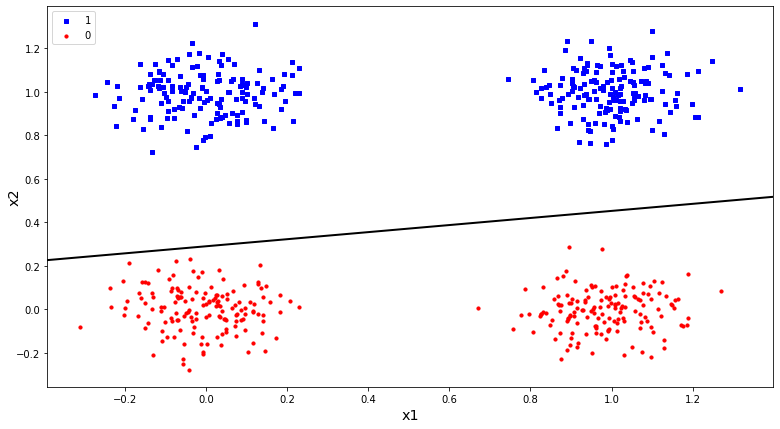

In [31]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 7.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [56]:
learning_rate = 0.01
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

    
c7e = epochs
c7a = adjustments
c7em = np.round(np.mean(epochs), 4)
c7esd = np.round(np.std(epochs), 4)
c7am = np.round(np.mean(adjustments), 4)
c7asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c7em, " Desvio Padrão: ", c7esd)
print("Ajustes. Média: ", c7am, " Desvio Padrão: ", c7asd)


	Iteração número  1

Quantidade total de épocas: 185
Quantidade total de ajustes: 10172
Vetor final de pesos: [ 7.0538 -9.1626 24.6224]

	Iteração número  2

Quantidade total de épocas: 70
Quantidade total de ajustes: 2744
Vetor final de pesos: [ 17.6677 -18.834   48.3116]

	Iteração número  3

Quantidade total de épocas: 97
Quantidade total de ajustes: 2915
Vetor final de pesos: [ 41.6789 -19.8288  80.4365]

	Iteração número  4

Quantidade total de épocas: 864
Quantidade total de ajustes: 23320
Vetor final de pesos: [ 19.6372 -29.196   65.2605]

	Iteração número  5

Quantidade total de épocas: 930
Quantidade total de ajustes: 13873
Vetor final de pesos: [ 22.7882 -33.8745  75.707 ]

	Iteração número  6

Quantidade total de épocas: 64
Quantidade total de ajustes: 15249
Vetor final de pesos: [1.5296 0.9044 2.2906]

	Iteração número  7

Quantidade total de épocas: 389
Quantidade total de ajustes: 6606
Vetor final de pesos: [ 12.0438 -17.899   40.017 ]

	Iteração número  8

Quantidade to


Quantidade total de épocas: 267
Quantidade total de ajustes: 8129
Vetor final de pesos: [22.2696  2.8769 68.8391]

	Iteração número  62

Quantidade total de épocas: 547
Quantidade total de ajustes: 2377
Vetor final de pesos: [60.176  35.7823 89.9505]

	Iteração número  63

Quantidade total de épocas: 225
Quantidade total de ajustes: 20361
Vetor final de pesos: [ 4.1931 -6.2256 13.9312]

	Iteração número  64

Quantidade total de épocas: 103
Quantidade total de ajustes: 2060
Vetor final de pesos: [58.9268 -6.8861 86.2999]

	Iteração número  65

Quantidade total de épocas: 351
Quantidade total de ajustes: 10154
Vetor final de pesos: [18.7211 11.1969 27.9965]

	Iteração número  66

Quantidade total de épocas: 474
Quantidade total de ajustes: 19429
Vetor final de pesos: [ 10.3866 -15.4206  34.4975]

	Iteração número  67

Quantidade total de épocas: 392
Quantidade total de ajustes: 9802
Vetor final de pesos: [  9.1972 -13.6667  30.5628]

	Iteração número  68

Quantidade total de épocas: 187

#### O seguinte vetor de pesos, obtido na última execução da configuração 7, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [57]:
weights = perceptron.weights
weights

array([59.0528,  9.2351, 83.4847])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [58]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.7073 -(0.1106)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

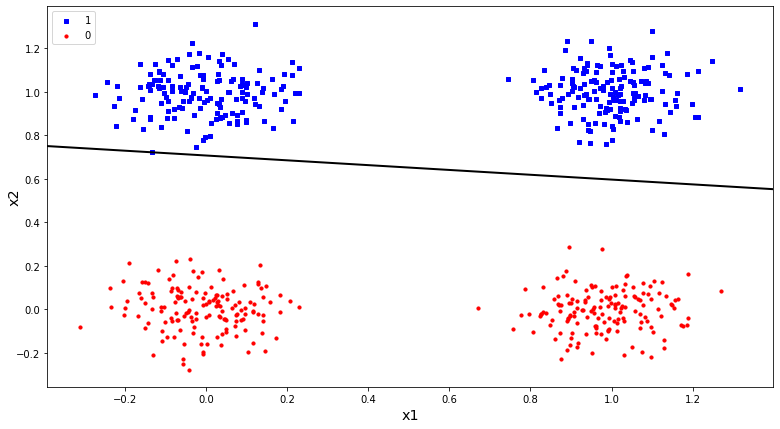

In [59]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 8.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [60]:
learning_rate = 0.01
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c8e = epochs
c8a = adjustments
c8em = np.round(np.mean(epochs), 4)
c8esd = np.round(np.std(epochs), 4)
c8am = np.round(np.mean(adjustments), 4)
c8asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c8em, " Desvio Padrão: ", c8esd)
print("Ajustes. Média: ", c8am, " Desvio Padrão: ", c8asd)


	Iteração número  1

Quantidade total de épocas: 3
Quantidade total de ajustes: 33
Vetor final de pesos: [ 0.068  -0.0377  0.1404]

	Iteração número  2

Quantidade total de épocas: 6
Quantidade total de ajustes: 124
Vetor final de pesos: [0.1516 0.0806 0.2364]

	Iteração número  3

Quantidade total de épocas: 7
Quantidade total de ajustes: 184
Vetor final de pesos: [ 0.0363 -0.0489  0.1212]

	Iteração número  4

Quantidade total de épocas: 9
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.2939 -0.4094  0.954 ]

	Iteração número  5

Quantidade total de épocas: 7
Quantidade total de ajustes: 108
Vetor final de pesos: [0.0999 0.0489 0.1645]

	Iteração número  6

Quantidade total de épocas: 13
Quantidade total de ajustes: 64
Vetor final de pesos: [ 0.2663 -0.3874  0.8917]

	Iteração número  7

Quantidade total de épocas: 11
Quantidade total de ajustes: 59
Vetor final de pesos: [0.4958 0.2936 0.7476]

	Iteração número  8

Quantidade total de épocas: 8
Quantidade total de ajustes: 


Quantidade total de épocas: 9
Quantidade total de ajustes: 144
Vetor final de pesos: [0.2668 0.1493 0.4121]

	Iteração número  64

Quantidade total de épocas: 10
Quantidade total de ajustes: 66
Vetor final de pesos: [0.4813 0.2849 0.7196]

	Iteração número  65

Quantidade total de épocas: 13
Quantidade total de ajustes: 68
Vetor final de pesos: [ 0.2681 -0.3754  0.8721]

	Iteração número  66

Quantidade total de épocas: 7
Quantidade total de ajustes: 23
Vetor final de pesos: [ 0.2545 -0.3045  0.8957]

	Iteração número  67

Quantidade total de épocas: 8
Quantidade total de ajustes: 13
Vetor final de pesos: [0.745  0.2754 1.0892]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 72
Vetor final de pesos: [ 0.2238 -0.0266  0.8415]

	Iteração número  69

Quantidade total de épocas: 7
Quantidade total de ajustes: 141
Vetor final de pesos: [0.2674 0.1572 0.4063]

	Iteração número  70

Quantidade total de épocas: 13
Quantidade total de ajustes: 62
Vetor final d

#### O seguinte vetor de pesos, obtido na última execução da configuração 8, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [61]:
weights = perceptron.weights
weights

array([ 0.2138, -0.299 ,  0.6949])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [62]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3077 -(-0.4303)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

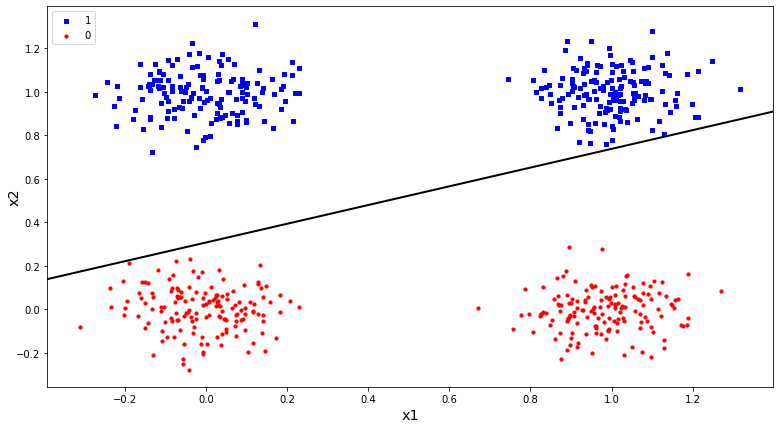

In [63]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 9.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [40]:
learning_rate = 0.01
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c9e = epochs
c9a = adjustments
c9em = np.round(np.mean(epochs), 4)
c9esd = np.round(np.std(epochs), 4)
c9am = np.round(np.mean(adjustments), 4)
c9asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c9em, " Desvio Padrão: ", c9esd)
print("Ajustes. Média: ", c9am, " Desvio Padrão: ", c9asd)


	Iteração número  1

Quantidade total de épocas: 8
Quantidade total de ajustes: 40
Vetor final de pesos: [ 0.0984 -0.1282  0.3148]

	Iteração número  2

Quantidade total de épocas: 6
Quantidade total de ajustes: 112
Vetor final de pesos: [0.0486 0.0139 0.071 ]

	Iteração número  3

Quantidade total de épocas: 3
Quantidade total de ajustes: 10
Vetor final de pesos: [ 0.2422 -0.2027  0.5867]

	Iteração número  4

Quantidade total de épocas: 7
Quantidade total de ajustes: 116
Vetor final de pesos: [ 0.0689 -0.0812  0.222 ]

	Iteração número  5

Quantidade total de épocas: 8
Quantidade total de ajustes: 73
Vetor final de pesos: [ 0.1046 -0.1481  0.3469]

	Iteração número  6

Quantidade total de épocas: 9
Quantidade total de ajustes: 106
Vetor final de pesos: [ 0.094  -0.1139  0.2949]

	Iteração número  7

Quantidade total de épocas: 7
Quantidade total de ajustes: 86
Vetor final de pesos: [0.2292 0.1293 0.3465]

	Iteração número  8

Quantidade total de épocas: 8
Quantidade total de ajustes


Quantidade total de épocas: 9
Quantidade total de ajustes: 77
Vetor final de pesos: [ 0.1271 -0.1817  0.4206]

	Iteração número  64

Quantidade total de épocas: 5
Quantidade total de ajustes: 44
Vetor final de pesos: [0.0385 0.0198 0.0604]

	Iteração número  65

Quantidade total de épocas: 8
Quantidade total de ajustes: 101
Vetor final de pesos: [ 0.0797 -0.1061  0.2757]

	Iteração número  66

Quantidade total de épocas: 5
Quantidade total de ajustes: 95
Vetor final de pesos: [0.0081 0.0024 0.0196]

	Iteração número  67

Quantidade total de épocas: 8
Quantidade total de ajustes: 97
Vetor final de pesos: [ 0.0902 -0.1223  0.3069]

	Iteração número  68

Quantidade total de épocas: 9
Quantidade total de ajustes: 93
Vetor final de pesos: [ 0.1006 -0.1426  0.3378]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 35
Vetor final de pesos: [ 0.0098 -0.0006  0.0281]

	Iteração número  70

Quantidade total de épocas: 5
Quantidade total de ajustes: 77
Vetor final

#### O seguinte vetor de pesos, obtido na última execução da configuração 9, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [41]:
weights = perceptron.weights
weights

array([ 0.0615, -0.0728,  0.1801])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [42]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3415 -(-0.4042)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

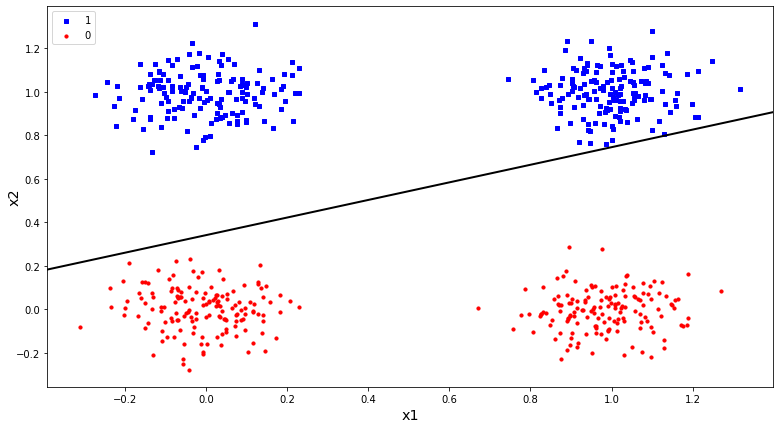

In [43]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

## Resultados e Observações

### Abaixo tem-se a relação com todas as configurações e os valores da taxa de apredizegem e do intervalo de pesos usado em cada uma

    Configuração 1
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-100.0, +100.0)
        
    Configuração 2
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 3
        > taxa de aprendizagem = 0.4
        > Intervalo uniforme de pesos = (-0.5, +0.5)
        
    Configuração 4
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-100.0, +100.0)
    
    Configuração 5
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 6
        > taxa de aprendizagem = 0.1
        > Intervalo uniforme de pesos = (-0.5, +0.5)
        
    Configuração 7
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-100.0, +100.0)
        
    Configuração 8
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-1.0, +1.0)
        
    Configuração 9
        > taxa de aprendizagem = 0.01
        > Intervalo uniforme de pesos = (-0.5, +0.5)

### As tabelas a seguir resumem o resultados obtidos a partir das execuções das cofigurações

#### Ordenando as configurações quanto à média de épocas em ordem decrescente

<div style="text-align: justify">A tabela abaixo demonstra os resultados obtidos com relação a média do número de épocas que cada configuração obteve em suas 100 execuções, a ordenação da tabela em ordem decrescente facilita a identificação das configurações que demandaram mais épocas para convergirem. 
</div>

<div style="text-align: justify">É nítido que as configurações cujo intervalo de peso era de (-100, +100) foram as que precisaram iterar mais vezes pelas entradas, sendo que para esse intervalo de pesos, a utilização de uma taxa de aprendizagem maior evidencia uma tendência de diminuição do esforço computacional, visto que a utilização desse intervalo de pesos juntamente com a taxa aprendizagem de 0.01 exigiu bem mais dos recursos computacionais em comparação às demais configurações que utilizaram esse mesmo intervalo de pesos.
</div>

<div style="text-align: justify">Com relação às demais configurações nota-se uma leve tendência de aumento do número de épocas com a taxa de aprendizado em 0.01. Já com relação ao uso de vetores de pesos com intervalo entre (-1, +1) e (-0.5,+0.5), não há uma clara diferença de performance.
</div> 

In [64]:
import pandas as pd

epochs_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média de Épocas': [c1em, c2em, c3em, c4em, c5em, c6em, c7em, c8em, c9em],
                'Desvio Padrão': [c1esd, c2esd, c3esd, c4esd, c5esd, c6esd, c7esd, c8esd, c9esd]}

epochs_table = pd.DataFrame(epochs_table)
epochs_table.set_index('Configuração', inplace=True)
epochs_table.sort_values(by='Média de Épocas', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média de Épocas,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",347.93,280.0180
4,0.1,"(-100.0, +100.0)",42.77,32.4323
1,0.4,"(-100.0, +100.0)",11.17,6.3389
8,0.01,"(-1.0, +1.0)",8.21,3.0473
9,0.01,"(-0.5, +0.5)",6.42,1.8664
5,0.1,"(-1.0, +1.0)",5.03,1.3150
3,0.4,"(-0.5, +0.5)",4.98,1.4141
2,0.4,"(-1.0, +1.0)",4.97,1.1176
6,0.1,"(-0.5, +0.5)",4.71,1.0421


#### Ordenando as configurações quanto à média de ajustes em ordem decrescente

<div style="text-align: justify">A tabela abaixo demonstra os resultados obtidos com relação a média do número de ajustes que cada configuração obteve em suas 100 execuções, a ordenação da tabela em ordem decrescente facilita a identificação das configurações que demandaram mais ajustes para convergirem.
</div>

<div style="text-align: justify">Mais uma vez é nítido que quando utilizado o intervalo de pesos (-100, +100) o gasto computacional é maior. O resultado desta tabela é bastante semelhante à anterior, algo esperado visto que há uma tendência de que um maior número de épocas leve também a um maior número de ajustes.
</div>

In [65]:
import pandas as pd

adjusts_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média de Ajustes': [c1am, c2am, c3am, c4am, c5am, c6am, c7am, c8am, c9am],
                'Desvio Padrão': [c1asd, c2asd, c3asd, c4asd, c5asd, c6asd, c7asd, c8asd, c9asd]}

adjusts_table = pd.DataFrame(adjusts_table)
adjusts_table.set_index('Configuração', inplace=True)
adjusts_table.sort_values(by='Média de Ajustes', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média de Ajustes,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",11683.35,7835.4383
4,0.1,"(-100.0, +100.0)",1140.24,626.4669
1,0.4,"(-100.0, +100.0)",274.47,181.3487
8,0.01,"(-1.0, +1.0)",127.00,74.7188
9,0.01,"(-0.5, +0.5)",66.38,33.1194
5,0.1,"(-1.0, +1.0)",16.94,9.2074
6,0.1,"(-0.5, +0.5)",10.10,5.3320
2,0.4,"(-1.0, +1.0)",8.49,3.5875
3,0.4,"(-0.5, +0.5)",7.62,3.3994


### Os gráficos a seguir ajudam a visualizar os resultados 

<div style="text-align: justify">Os gráficos de boxplot para as épocas e os ajustes oferecem uma melhor noção do gasto computacional entre as diferentes configurações, vemos que a configuração 7, é notoriamente a de pior performance, essa configuração utiliza a menor taxa de aprendizagem com a maior amplitude dos pesos. Nota-se um grande ganho de performance aumentando de 0.01 para 0.1 a taxa de aprendizagem, sendo essa justamente a configuração 4, mas ainda assim, com um custo computacional muito maior do que as demais configurações. A diferença é tão grande que o boxplot das demais configurações quase nem aparece no gráfico dimensionado para mostrar a configuração 7.
</div>

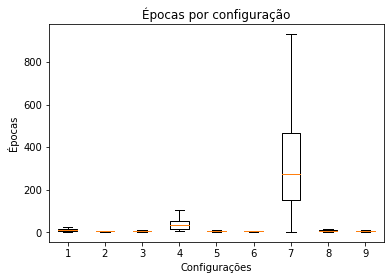

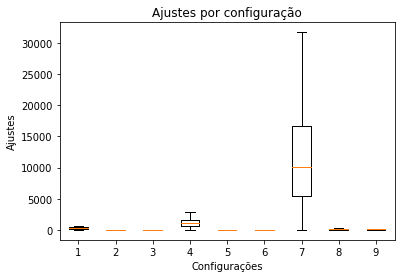

In [66]:
#Boxplot para as épocas
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.boxplot([c1e, c2e, c3e, c4e, c5e, c6e, c7e, c8e, c9e], showfliers=False)

ax1.set_title('Épocas por configuração')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('Épocas')
plt.show()

#Boxplot para os ajustes
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c1a, c2a, c3a, c4a, c5a, c6a, c7a, c8a, c9a], showfliers=False)

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

#### Bloxplot sem as configurações 4 e 7

<div style="text-align: justify">A fim de se observar melhor o comportamento das demais configurações, as configurações 4 e 7 foram removidas, assim pode se observar que as configurações 1, 8 e 9, parecem apresentar um pior desempenho dentre as que sobraram. A configuração 1 utiliza o intervalo de peso entre (-100, +100), porém uma taxa de aprendizagem de 0.4, o que explica sua melhor performance em relação às configurações 4 e 7. Ambas as configurações 8 e 9, utilizam a baixa taxa de aprendizagem de 0.01, e apesar do intervalo de pesos menor, a utilização de uma taxa de aprendizagem tão baixa, teve forte contribuição no menor desempenho com relação às configurações 2, 3 ,5 e 6.
</div>

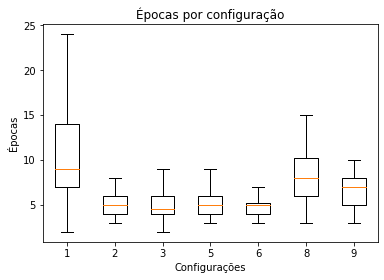

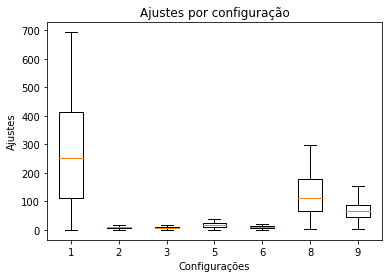

In [67]:
#Boxplot para as épocas sem as configurações 4 e 7
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.boxplot([c1e, c2e, c3e, c5e, c6e, c8e, c9e], showfliers=False, 
            labels = ['1','2','3','5','6','8','9'])

ax1.set_title('Épocas por configuração')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('Épocas')
plt.show()


#Boxplot para os ajustes sem as configurações 4 e 7
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c1a, c2a, c3a, c5a, c6a, c8a, c9a], showfliers=False,
            labels = ['1','2','3','5','6','8','9'])

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

<div style="text-align: justify">Por fim, o boxplot dos ajustes por configuração das configurações 2, 3, 5 e 6, foi uma tentativa de averiguar diferenças significativas entre essas configurações. No gráfico de épocas por configuração acima não foi possível notar, porém no gráfico abaixo, vemos uma ligeira desvantagem para as configurações 5 e 6, as quais precisaram de alguns ajustes a mais do que suas concorrentes. Em comum as configurações 5 e 6 utilizam uma taxa de aprendizagem de 0.1, enquanto que as duas melhores configurações a 2 e a 3 usam 0.4. No entanto, as diferença entre essas 4 configurações é bem pequena, ainda mais considerando o poder computacional disponível atualmente, onde alguns ajustes a mais não representam uma perda de performance perceptível.
</div>

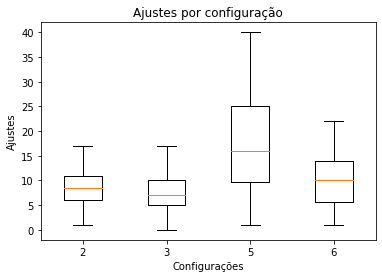

In [68]:
#Boxplot para os ajustes sem as configurções 1, 4, 7, 8 e 9
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.boxplot([c2a, c3a, c5a, c6a], showfliers=False,
            labels = ['2','3','5','6'])

ax2.set_title('Ajustes por configuração')
ax2.set_xlabel('Configurações')
ax2.set_ylabel('Ajustes')

plt.show()

<div style="text-align: justify">Os experimentos e os resultados apresentados nas tabelas e nos gráficos, demonstram que a melhor performance foi atingida ao se utilizar uma taxa de aprendizagem entre 0.1 e 0.4 e pesos entre (-1,+1) e (-0.5, +0.5). Intervalos de pesos muito grandes e taxas de aprendizagem muito baixas levam o algoritmo do Perceptron de Rosenblatt a precisar de mais épocas e consequentemente mais ajustes para obter o vetor peso solução de um problema linearmente separável.
</div>